In [1]:
# Import dependencies

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random lat and long combinations

lats = np.random.uniform(low= -90.000, high = 90.000, size = 1500)

lngs = np.random.uniform(low = -180.000, high=180.00, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# create a list for holding the cities

cities = []

#Identify the nearest city for each latitude and longitutde combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list. 
    
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm sufficient count.

len(cities)

574

In [6]:
import requests

In [7]:
requests.__version__

'2.27.1'

In [8]:
#import the time library and the datetime module from the datetime library

import time

from datetime import datetime

import requests

from config import weather_api_key

In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | waipawa
Processing Record 3 of Set 1 | paciran
Processing Record 4 of Set 1 | zyryanka
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | yazman
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | krasnyy chikoy
Processing Record 11 of Set 1 | sisimiut
Processing Record 12 of Set 1 | lavrentiya
Processing Record 13 of Set 1 | conceicao do araguaia
Processing Record 14 of Set 1 | lagoa
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | tiznit
Processing Record 20 of Set 1 | tacna
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | bambous virieux
Processing Record 23 of Set 1 | lloydminster
Processing Record 

Processing Record 40 of Set 4 | sept-iles
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | labutta
City not found. Skipping...
Processing Record 44 of Set 4 | ola
Processing Record 45 of Set 4 | peniche
Processing Record 46 of Set 4 | jalu
Processing Record 47 of Set 4 | plettenberg bay
Processing Record 48 of Set 4 | chuguyevka
Processing Record 49 of Set 4 | tungor
Processing Record 50 of Set 4 | oliveira dos brejinhos
Processing Record 1 of Set 5 | kargasok
Processing Record 2 of Set 5 | aberdeen
Processing Record 3 of Set 5 | deputatskiy
Processing Record 4 of Set 5 | betioky
Processing Record 5 of Set 5 | nanakuli
Processing Record 6 of Set 5 | linares
Processing Record 7 of Set 5 | lunsar
Processing Record 8 of Set 5 | arraial do cabo
Processing Record 9 of Set 5 | saldanha
Processing Record 10 of Set 5 | severnoye
Processing Record 11 of Set 5 | college
Processing Record 12 of Set 5 | nikolskoye
Processing Record

Processing Record 25 of Set 8 | woodstock
Processing Record 26 of Set 8 | rajura
Processing Record 27 of Set 8 | miandrivazo
Processing Record 28 of Set 8 | qaqortoq
Processing Record 29 of Set 8 | araouane
Processing Record 30 of Set 8 | geraldton
Processing Record 31 of Set 8 | quirinopolis
Processing Record 32 of Set 8 | tshikapa
Processing Record 33 of Set 8 | roanoke rapids
Processing Record 34 of Set 8 | yulara
Processing Record 35 of Set 8 | lasa
Processing Record 36 of Set 8 | nalut
Processing Record 37 of Set 8 | kokopo
Processing Record 38 of Set 8 | iralaya
Processing Record 39 of Set 8 | kununurra
Processing Record 40 of Set 8 | bilma
Processing Record 41 of Set 8 | chapais
Processing Record 42 of Set 8 | hambantota
Processing Record 43 of Set 8 | ahumada
City not found. Skipping...
Processing Record 44 of Set 8 | pangody
Processing Record 45 of Set 8 | asau
Processing Record 46 of Set 8 | san jose de sisa
Processing Record 47 of Set 8 | saskylakh
Processing Record 48 of Se

Processing Record 15 of Set 12 | huarmey
Processing Record 16 of Set 12 | santa rosa de osos
Processing Record 17 of Set 12 | kudahuvadhoo
Processing Record 18 of Set 12 | uyaan
Processing Record 19 of Set 12 | puqi
Processing Record 20 of Set 12 | nemuro
Processing Record 21 of Set 12 | irun
Processing Record 22 of Set 12 | drayton valley
Processing Record 23 of Set 12 | corrales
Processing Record 24 of Set 12 | fomboni
-----------------------------
Data Retrieval Complete      
-----------------------------


In [20]:
len(city_data)

531

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,59.52,40,100,16.11,US,2022-10-09 18:43:49
1,Waipawa,-41.4122,175.5153,49.84,73,0,12.77,NZ,2022-10-09 18:44:00
2,Paciran,-6.8767,112.3761,79.65,83,100,3.76,ID,2022-10-09 18:44:01
3,Zyryanka,65.7500,150.8500,10.76,88,100,8.75,RU,2022-10-09 18:44:01
4,Thompson,55.7435,-97.8558,50.16,43,75,8.05,CA,2022-10-09 18:42:19
5,Ushuaia,-54.8000,-68.3000,47.86,66,40,20.71,AR,2022-10-09 18:41:32
6,Yazman,29.1212,71.7446,82.22,55,0,8.14,PK,2022-10-09 18:44:02
7,Chuy,-33.6971,-53.4616,57.29,52,95,10.22,UY,2022-10-09 18:44:03
8,Krasnyy Chikoy,50.3643,108.7512,26.82,58,11,3.20,RU,2022-10-09 18:44:04
9,Sisimiut,66.9395,-53.6735,27.93,73,100,6.55,GL,2022-10-09 18:44:04


In [31]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-10-09 18:43:49,42.0970,-79.2353,59.52,40,100,16.11
1,Waipawa,NZ,2022-10-09 18:44:00,-41.4122,175.5153,49.84,73,0,12.77
2,Paciran,ID,2022-10-09 18:44:01,-6.8767,112.3761,79.65,83,100,3.76
3,Zyryanka,RU,2022-10-09 18:44:01,65.7500,150.8500,10.76,88,100,8.75
4,Thompson,CA,2022-10-09 18:42:19,55.7435,-97.8558,50.16,43,75,8.05
...,...,...,...,...,...,...,...,...,...
526,Nemuro,JP,2022-10-09 18:58:53,43.3236,145.5750,56.75,71,100,22.19
527,Irun,ES,2022-10-09 18:58:53,43.3390,-1.7894,72.25,79,0,0.00
528,Drayton Valley,CA,2022-10-09 18:58:54,53.2168,-114.9854,65.32,41,100,5.08
529,Corrales,US,2022-10-09 18:58:54,35.2378,-106.6067,70.05,58,75,5.75


In [32]:
# Create the output file CSV

output_data_file = "weather_data/cities.csv"

# Export the city_data into a csv

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
#Extract relevant fields from the DataFrame for Plotting

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]



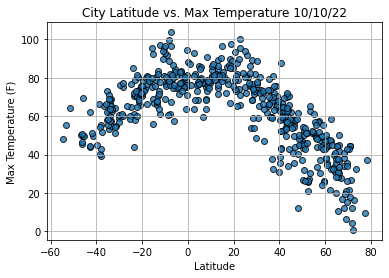

In [36]:
# MAX TEMP - Add the following code to create a scatter plot for lat vs max temp 

# Import time module

import time

# Build the scatter plot for latitude vs. max temp

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker = "o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# Show Plot

plt.show()

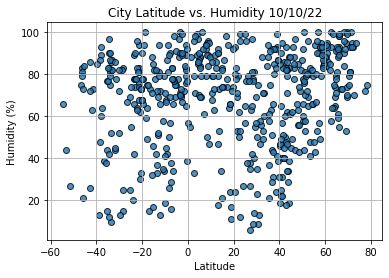

In [41]:
# HUMIDITY - Add the following code to create a scatter plot for lat vs max temp 

# Import time module

import time

# Build the scatter plot for latitude vs. max temp

plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker = "o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

# Show Plot

plt.show()

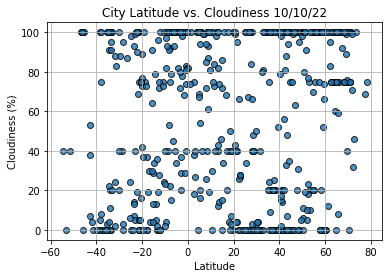

In [42]:
# CLOUDINESS - Add the following code to create a scatter plot for lat vs max temp 

# Import time module

import time

# Build the scatter plot for latitude vs. max temp

plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker = "o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show Plot

plt.show()

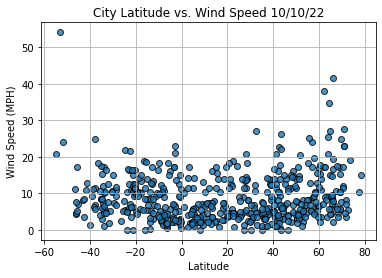

In [43]:
# WIND SPEED - Add the following code to create a scatter plot for lat vs max temp 

# Import time module

import time

# Build the scatter plot for latitude vs. max temp

plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker = "o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (MPH)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show Plot

plt.show()